In [ ]:
import numpy as np
import pandas as pd

### Cast date data to DateTime Object

In [2]:
waitTime = pd.read_csv("./data/disneyRideTimes.csv")
waitTime.head()

C:\Users\82751\AppData\Local\Temp\ipykernel_8624\1473116668.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  waitTime = pd.read_csv("./data/disneyRideTimes.csv")


,rideID,dateTime,waitMins,fastPassTime,status
0,353289,2017-05-22 00:56:31,NaN,NaN,Closed
1,353289,2017-05-22 01:30:15,NaN,NaN,Closed
2,353289,2017-05-22 02:30:16,NaN,NaN,Closed
3,353289,2017-05-22 03:30:15,NaN,NaN,Closed
4,353289,2017-05-22 04:30:06,NaN,NaN,Closed


In [3]:
from datetime import datetime,timedelta
waitTime["dateTime"] = waitTime["dateTime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
waitTime["day"] = [str(i.year) + "-" + str(i.month) + "-" + str(i.day) for i in waitTime["dateTime"]]
waitTime.head()

,rideID,dateTime,waitMins,fastPassTime,status,day
0,353289,2017-05-22 00:56:31,NaN,NaN,Closed,2017-5-22
1,353289,2017-05-22 01:30:15,NaN,NaN,Closed,2017-5-22
2,353289,2017-05-22 02:30:16,NaN,NaN,Closed,2017-5-22
3,353289,2017-05-22 03:30:15,NaN,NaN,Closed,2017-5-22
4,353289,2017-05-22 04:30:06,NaN,NaN,Closed,2017-5-22


In [4]:
weather = pd.read_csv("./data/hourlyWeather.csv")
weather.head()

,resortID,dateTime,rainStatus,feelsLikeF
0,80008297,2017-05-22 00:00:00,0,68
1,80008297,2017-05-22 01:00:00,0,66
2,80008297,2017-05-22 02:00:00,0,64
3,80008297,2017-05-22 03:00:00,0,64
4,80008297,2017-05-22 04:00:00,0,63


In [5]:
weather = pd.read_csv("./data/hourlyWeather.csv")
weather["dateTime"] = weather["dateTime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
weather["day"] = [str(i.year) + "-" + str(i.month) + "-" + str(i.day) for i in weather["dateTime"]]
weather.day.unique().shape


(486,)

### Clean the rides.csv data

In [6]:
rides = pd.read_csv("rideDuration.csv")
rides.land.value_counts(dropna= False)

Fantasyland            15
Tomorrowland           11
Paradise Pier          10
Main Street, U.S.A.    10
Hollywood Land          9
a bug's land            9
Mickey's Toontown       8
Cars Land               7
Frontierland            6
Adventureland           4
Disneyland Resort       4
Critter Country         3
Grizzly Peak            3
New Orleans Square      3
Buena Vista Street      2
Pacific Wharf           1
Pixar Pier              1
Name: land, dtype: int64

### Adjecency matrix

#### Create the csv for location

In [7]:
print(len(rides.land.unique()))
ride_geolocation = {
    'Hollywood Land':[33.80778673507492, -117.91719867303149],
    'Tomorrowland':[33.812353064677545, -117.91701526214526],
    'Frontierland':[33.812587950029865, -117.9204321713711],
    'Pixar Pier':[33.80492137310263, -117.92192493274977],
    'Fantasyland':[33.81379142944222, -117.91878303584073],
    "Mickey's Toontown":[33.81556890648705, -117.91855337507695],
    'Critter Country':[33.81254090099026, -117.9228528480938],
    'Main Street, U.S.A.':[33.81068049216946, -117.91886841925782],
    'Adventureland':[33.81189281565929, -117.91985419042162],
    "a bug's land":[33.818823649723285, -117.918373881718],
    'Paradise Pier':[33.806491130538106, -117.92439495541441],
    'Grizzly Peak':[33.80710515721414, -117.92096230391353],
    'New Orleans Square':[33.81137985912763, -117.92147571581243],
    'Pacific Wharf':[33.80588556149499, -117.91991682322454],
    'Cars Land':[33.80582368786923, -117.91869809253552],
    'Buena Vista Street':[33.808037025883515, -117.91883945787984],
    'Disneyland Resort':[33.81198618623628, -117.92198055834338]
}


17


In [39]:
# landLocation = pd.DataFrame()
# landLocation["name"] = list(ride_geolocation.keys())
# landLocation["longitude"] = np.array(list(ride_geolocation.values())).T[0]
# landLocation["latitude"] = np.array(list(ride_geolocation.values())).T[1]
# landLocation["landID"] = landLocation.index
# landLocation.head()
# landLocation.to_csv("Data\landLocation.csv")

#### Adjacency Matrix

In [8]:
landLocation = pd.read_csv("Data\landLocation.csv")
landLocation

,Unnamed: 0,name,longitude,latitude,landID
0,0,Hollywood Land,33.807787,-117.917199,0
1,1,Tomorrowland,33.812353,-117.917015,1
2,2,Frontierland,33.812588,-117.920432,2
3,3,Pixar Pier,33.804921,-117.921925,3
4,4,Fantasyland,33.813791,-117.918783,4
5,5,Mickey's Toontown,33.815569,-117.918553,5
6,6,Critter Country,33.812541,-117.922853,6
7,7,"Main Street, U.S.A.",33.810680,-117.918868,7
8,8,Adventureland,33.811893,-117.919854,8
9,9,a bug's land,33.818824,-117.918374,9


In [9]:
rides = pd.read_csv("rideDuration.csv")
rides.head()

# location_for_nan = ["Main Street, U.S.A.","Main Street, U.S.A.","Main Street, U.S.A.","a bug's land","Main Street, U.S.A.","Fantasyland","Paradise Pier","Frontierland",
#  "Hollywood Land","Buena Vista Street","Mickey's Toontown",None,"a bug's land","Disneyland Resort",None,"a bug's land",None,None,"Cars Land","Cars Land","Hollywood Land",
#  "a bug's land","Hollywood Land"]
# rides.land[[index for index,content in enumerate(rides.land) if type(content)!=str]] = location_for_nan
# rides.land.value_counts(dropna= False)

,Unnamed: 0,id,parkID,name,land,height,duration_min,popularity,landID
0,0,353289,336894,Animation Academy,Hollywood Land,NaN,23.0,MAA,0
1,1,353387,336894,"Monsters, Inc. Mike & Sulley to the Rescue!",Hollywood Land,NaN,5.0,MAA,0
2,2,353433,336894,Sorcerer's Workshop,Hollywood Land,NaN,30.0,MIA,0
3,3,353451,336894,Guardians of the Galaxy – Mission: BREAKOUT!,Hollywood Land,40.0,6.0,NaN,0
4,4,353457,336894,Turtle Talk with Crush,Hollywood Land,NaN,17.0,MIA,0


In [98]:
rides

,Unnamed: 0,id,parkID,name,land,height,duration_min,popularity,landID
0,0,353289,336894,Animation Academy,Hollywood Land,NaN,23.0,MAA,0
1,1,353387,336894,"Monsters, Inc. Mike & Sulley to the Rescue!",Hollywood Land,NaN,5.0,MAA,0
2,2,353433,336894,Sorcerer's Workshop,Hollywood Land,NaN,30.0,MIA,0
3,3,353451,336894,Guardians of the Galaxy – Mission: BREAKOUT!,Hollywood Land,40.0,6.0,NaN,0
4,4,353457,336894,Turtle Talk with Crush,Hollywood Land,NaN,17.0,MIA,0


<AxesSubplot:>

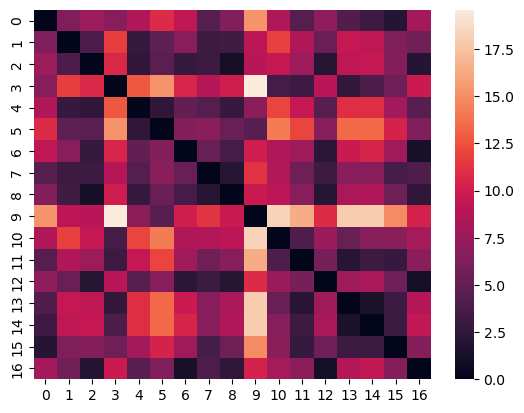

In [45]:
import geopy.distance
landLocation = pd.read_csv("Data\landLocation.csv")
adjacency_mat = np.zeros([17,17])
walking_speed = 0.0804672 # km/min

for i in range(len(landLocation)):
    start = [landLocation.loc[i]["longitude"],landLocation.loc[i]["latitude"]]
    for j in range(len(landLocation)):
        destination =  [landLocation.loc[j]["longitude"],landLocation.loc[j]["latitude"]]
        adjacency_mat[i][j] = geopy.distance.geodesic(start,destination).km/walking_speed

import seaborn as sns
sns.heatmap(adjacency_mat)

In [95]:
rides[rides.id == 17734741]

,Unnamed: 0,id,parkID,name,land,height,duration_min,popularity,landID
61,61,17734741,330339,The Disney Gallery,"Main Street, U.S.A.",NaN,15.0,MIA,7


In [100]:
waitTime.head()

,rideID,dateTime,waitMins,fastPassTime,status,day
0,353289,2017-05-22 00:56:31,NaN,NaN,Closed,2017-5-22
1,353289,2017-05-22 01:30:15,NaN,NaN,Closed,2017-5-22
2,353289,2017-05-22 02:30:16,NaN,NaN,Closed,2017-5-22
3,353289,2017-05-22 03:30:15,NaN,NaN,Closed,2017-5-22
4,353289,2017-05-22 04:30:06,NaN,NaN,Closed,2017-5-22


### The Environment Object

In [101]:
def locate_event(time: datetime, time_array):
    # time is a datetime object

    if len(time_array) == 0: # There is no waittime for a ride at the day
        return False
    
    delta_time_array = np.array([(time-i).total_seconds() for i in time_array])
    delta_time_array[(delta_time_array > 0)] = np.inf # only use negative index values

    # if the time selected is less than 30 mintues (1800 secs) to the current time
    if np.min(np.abs(delta_time_array)) < 1800: #
        return np.argmin(np.abs(delta_time_array))
    
    # the selected time is so far from the actual time
    else:
        return False


class DisneyEnvironment:
    def __init__(self,waittime_df,weather_df,rides_df,adjacency_matrix):

        # Dataframe for extracting data
        self.waittime = waittime_df
        self.weather = weather_df
        self.ridesinfo = rides_df
        self.rides = rides_df.id
        self.avalible_days = set(self.waittime.day.unique())

        # Action space
        self.action_space = np.append(np.arange(len(self.rides)),999) # 999 indicates wait for 10 min

        # adjecency matrix
        self.adjacency_matrix = adjacency_matrix

        # The current day we are in
        self.current_day = None
        self.current_time = None
        self.current_location = None
        self.waittime_today = None
        self.weather_today = None
        self.past_actions = None


        # reward
        self.reward_dict= {
             "MAA":20,
             "MIA":10,
             "HD":20
        }
        
    def __get_observation(self):

        # for each attraction, return its wait time
        waittime = np.array([])
        for ride_id in self.rides:
            event = locate_event(self.current_time,self.waittime_today[self.waittime_today.rideID == ride_id].dateTime)
            if event:
                t = waittime,self.waittime_today.iloc()[event].waitMins
            else:
                t = 999
            waittime = np.append(waittime,t)
      
        # distance
        distance = self.adjacency_matrix[self.current_location]

        # weather
        event = locate_event(self.current_time,self.weather_today.dateTime)
        if event == False:
            weather = [0,50]
        else:
            weather = [self.weather_today.iloc()[event].rainStatus,self.weather_today.iloc()[event].feelsLikeF]

        observation = np.vstack([waittime,distance,weather,self.past_actions])
        return observation


    def reset(self):

        '''
        OBSERVATIONS: 
        Waittime: Waittime for 110 rides [106]
        Distance: Distance to 18 lands [18]
        Weather: temperature and precipitation [2]
        Past Actions: A vector of 0 and 1 showing rides haven't been done [110]
        '''
        # reset past actions
        self.past_actions = np.zeros(len(self.rides))

        # initialize the day and location
        self.current_day = np.random.choice(list(self.avalible_days))
        self.current_time = datetime.strptime(self.current_day+ " 08:00:00","%Y-%m-%d %H:%M:%S")
        self.avalible_days.remove(self.current_day)
        self.current_location =  61 # The location of disney gallery, which locates at the entrance of the disneyland

        # locate the day
        self.waittime_today = self.waittime[self.waittime.day == self.current_day]
        self.weather_today = self.weather[self.weather.day == self.current_day]

        observation = self.__get_observation()
        return observation

    def step(self,action:int): # action is the index of the ride!! Not the ride ID

        terminated = False
        info = None
        observation = None

        # REWARD
        popularity = self.ridesinfo[action]
        if type(popularity) == str:
            reward = self.reward_dict[popularity]
        else: # popularity is none
            reward = 1
        
        '''
        discount the reward using past_actions: if a ride is popular, one would ride is several times. 
        Less popular rides would not be rided for several times
        '''
        if action != 999:
            reward /= (2**(self.past_actions[action]))
        
        # STATE
        # update pass actions
        if action != 999:
            self.past_actions[action] += 1

        # Next time stamp
        travel_duration = self.adjacency_matrix[self.rides.landID[action]][self.rides.landID[self.current_location]]
        ride_duration = self.ridesinfo.duration_min[action]
        self.current_time += timedelta(minute =(travel_duration+ride_duration))

        # if the day is done
        if self.current_time.hour > 22: # disney closes at 22
            terminated = True
            return observation,reward,terminated,info
        else: 

            # get the observation
            observation = self.__get_observation()

            # update current location
            self.current_location = action

            return observation, reward, terminated, info

    def close():
        pass

In [102]:
env = DisneyEnvironment(waitTime,weather,rides,adjacency_mat)
observation = env.reset()

c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\numpy\core\fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


IndexError: index 61 is out of bounds for axis 0 with size 17